In [12]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns            #Statistical Data Visualization
import warnings
from IPython.display import Image, display

%pylab inline

import os

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.reset_option('max_columns')
#pd.reset_option('max_rows')

Populating the interactive namespace from numpy and matplotlib


In [13]:
donneesInitiales = pd.read_csv('marketing_campaign.xls', sep='\t')
donneesInitiales.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [14]:
donneesInitiales.shape

(2240, 29)

In [15]:
donnees = pd.read_csv('ifood_df.csv')
# cible = donnees.Response
# donnees.drop(columns='Response', inplace=True)

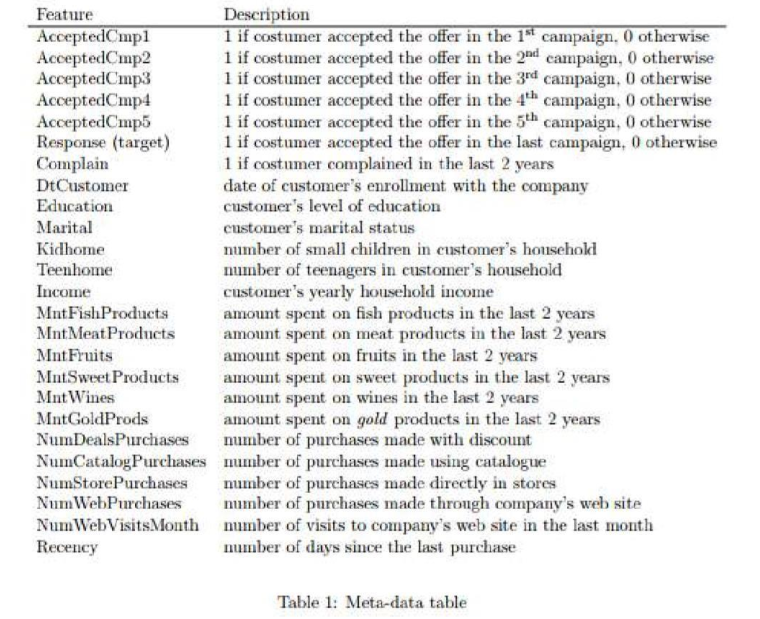

In [16]:
display(Image(filename='dictionary.png'))

In [17]:
donnees.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


# Classification ascendante hiérarchique

In [18]:
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)
def afficheDendrogram(*args, **kwargs):
    font1 = fm.FontProperties(size=20)
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Classification Hiérarchique Ascendante', 
                  fontproperties=font2)
        plt.xlabel("index de l'échantillon ou (taille du cluster)", fontproperties=font1)
        plt.ylabel('distance', fontproperties=font1)
        plt.xticks(fontproperties=font1)
        plt.yticks(fontproperties=font1)
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center', fontproperties=font1)
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(donnees, method='ward')

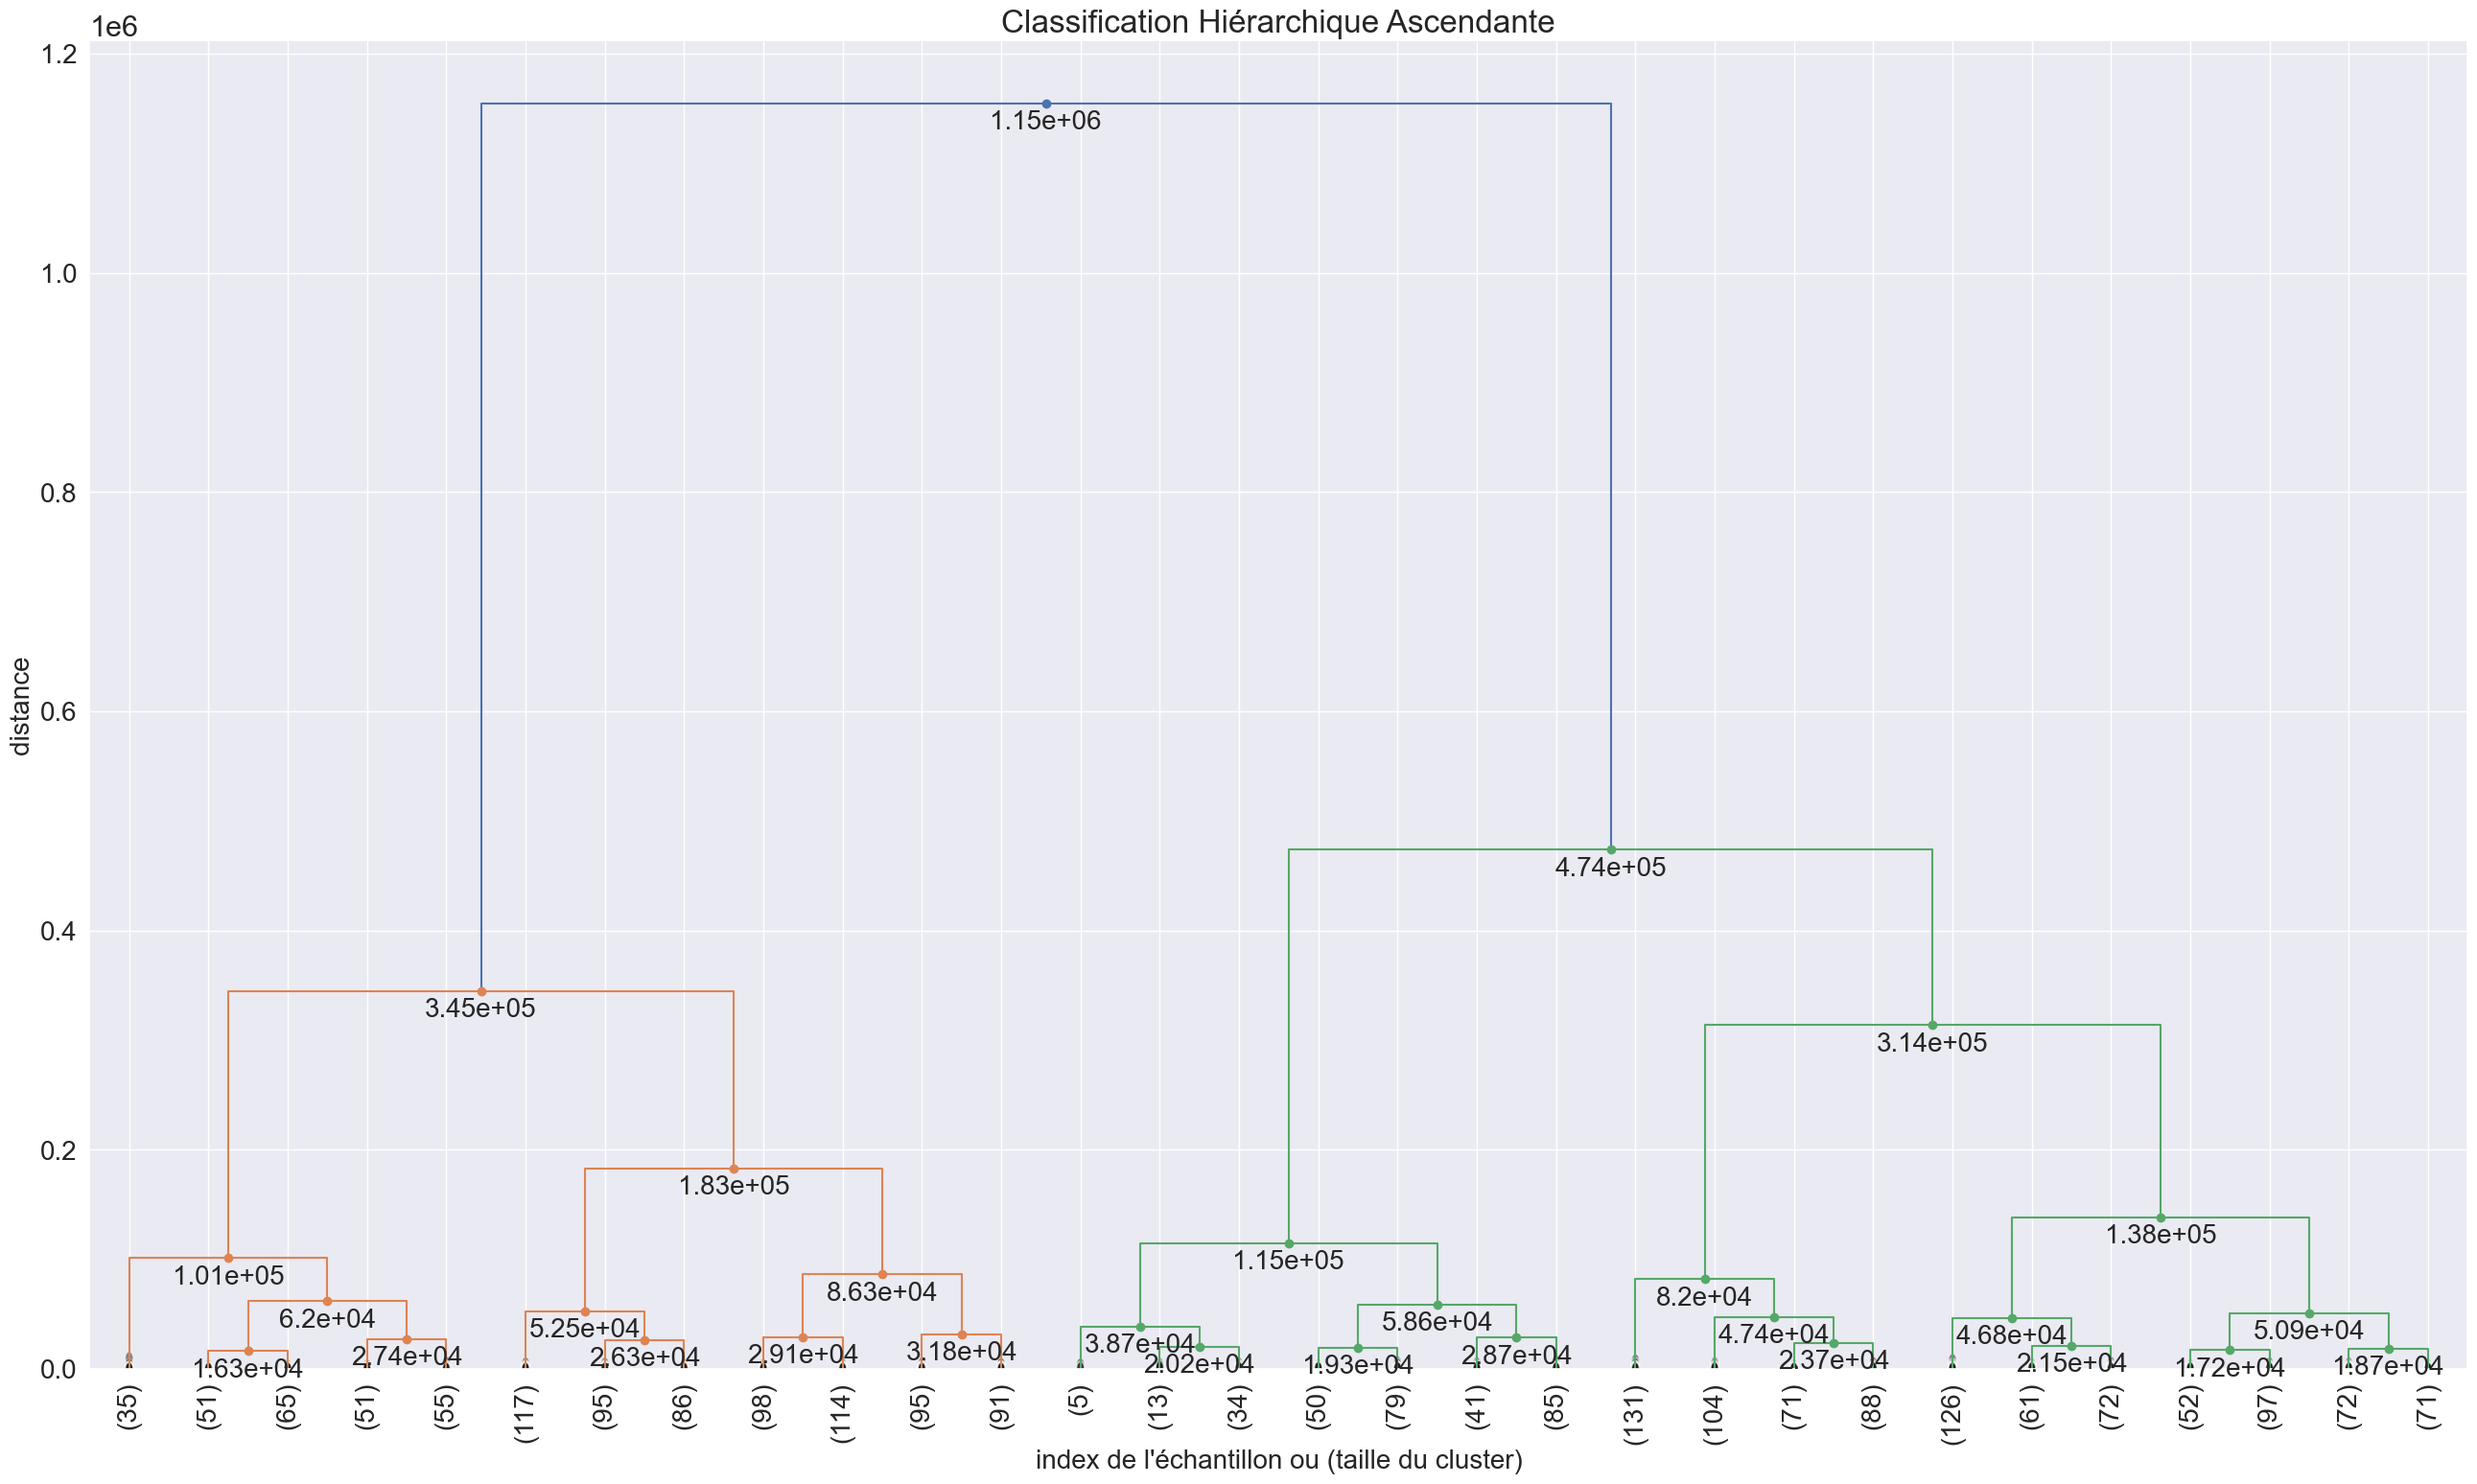

In [20]:
plt.figure(figsize=(32, 18))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
#     p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,  # useful in small plots so annotations don't overlap
#     max_d = 180,
)
plt.show()

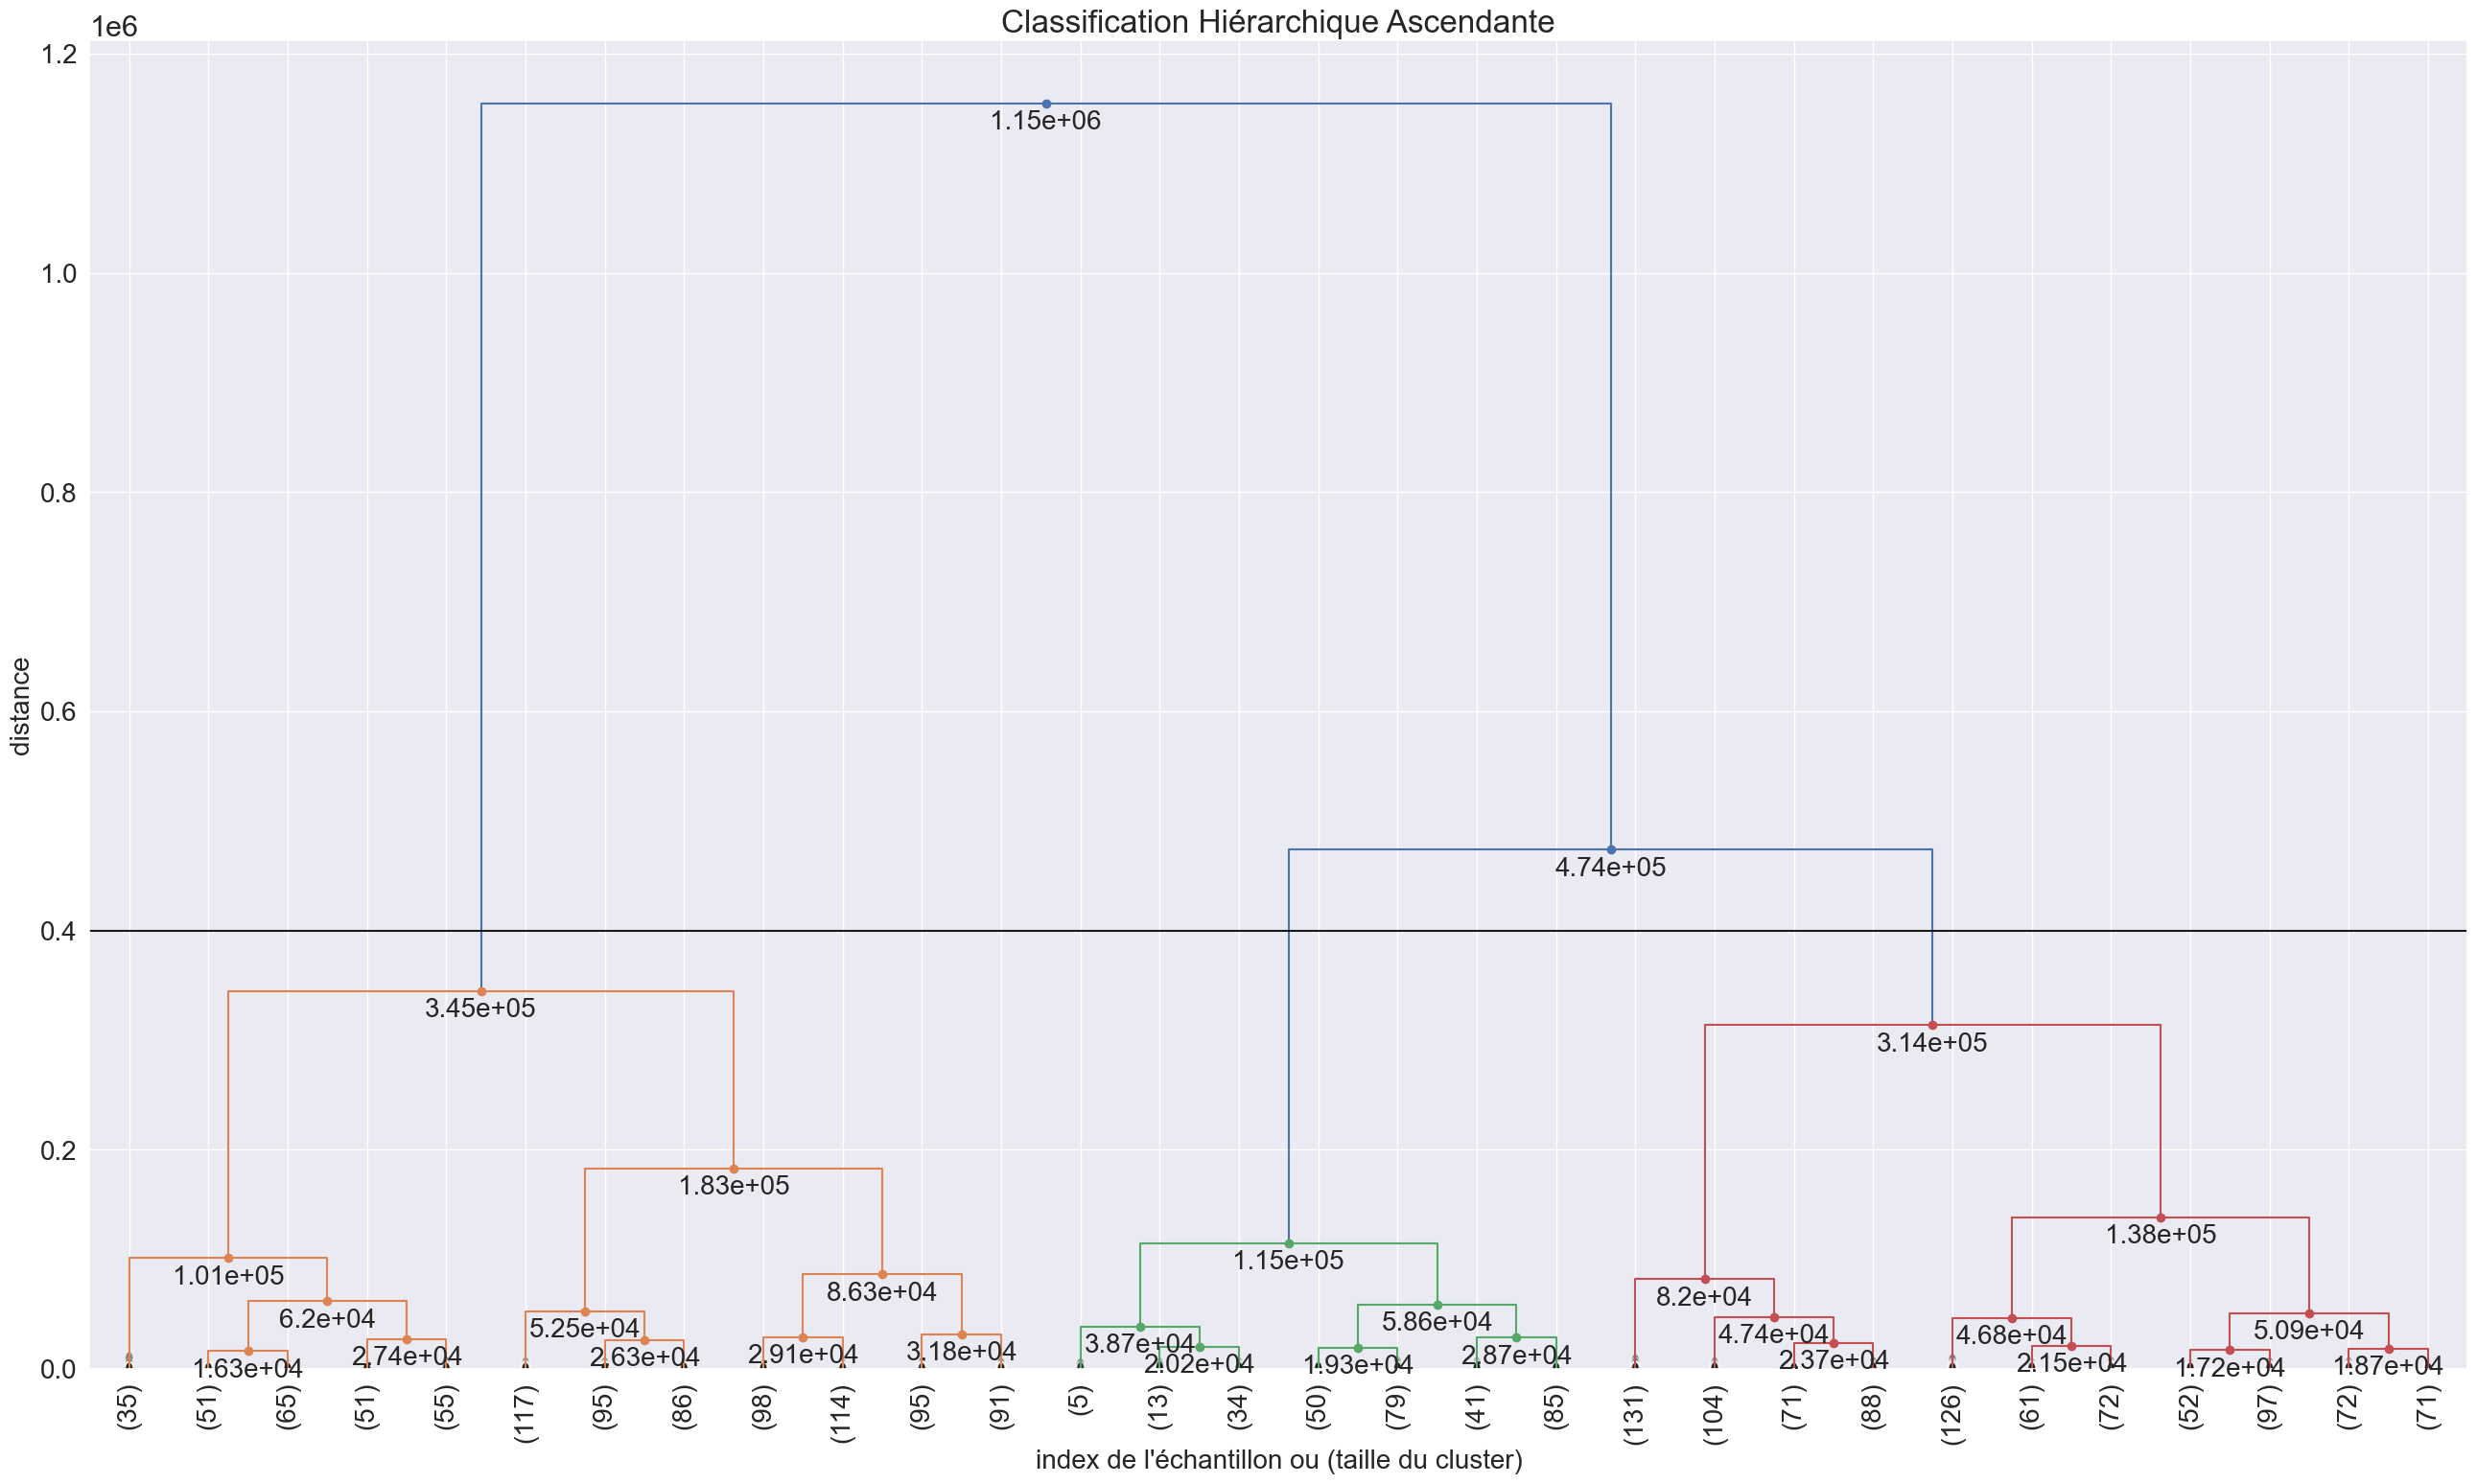

In [21]:
plt.figure(figsize=(32, 18))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
#     p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,  # useful in small plots so annotations don't overlap
    max_d = 4e+5,
)
plt.show()

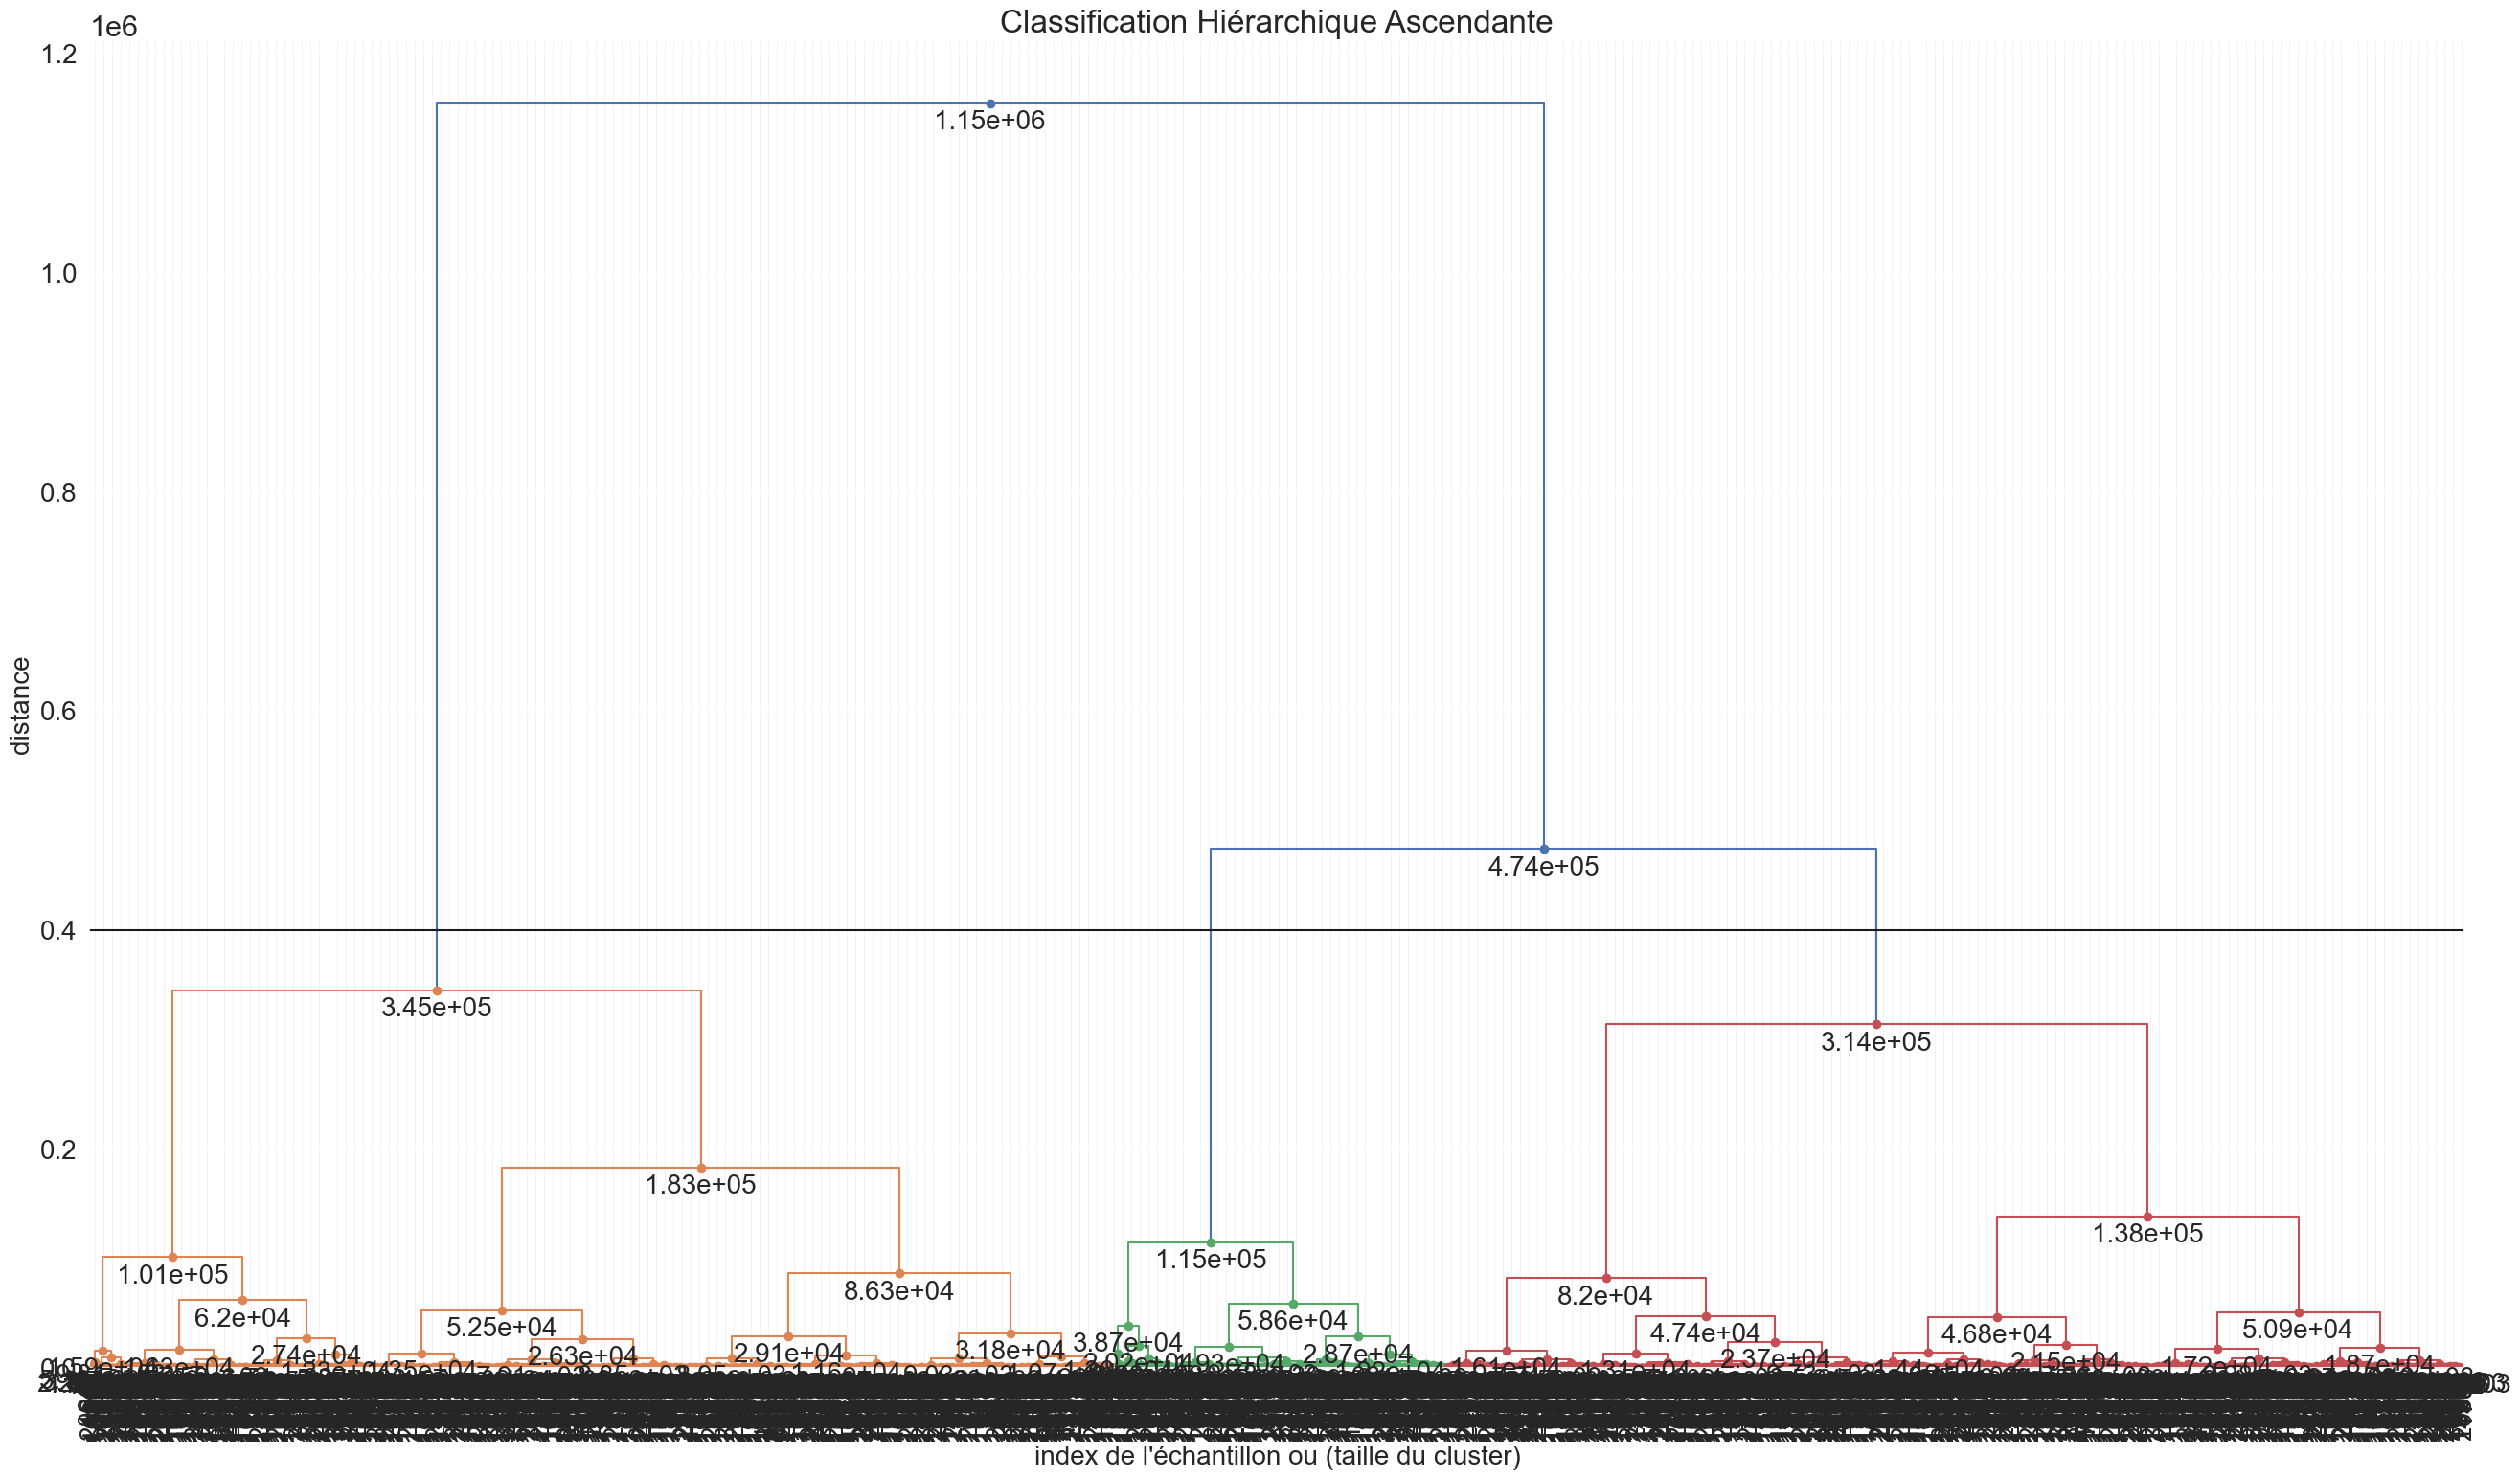

In [22]:
plt.figure(figsize=(32, 18))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=2205,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,  # useful in small plots so annotations don't overlap
    max_d = 4e+5,
)
plt.show()

# Le variables 

In [23]:
donnees.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [24]:
donnees.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

## Les variables Quantitatives et Qualitatives 

In [25]:
Quantitatives = list()
Qualitatives  = list()
for nom in donnees.columns:
    print(f'{nom:20s}\t--\t{donnees[nom].unique().size}')
    if donnees[nom].unique().size > 10 : 
        Quantitatives.append(nom) 
    else :
        Qualitatives.append(nom)        

Income              	--	1963
Kidhome             	--	3
Teenhome            	--	3
Recency             	--	100
MntWines            	--	775
MntFruits           	--	158
MntMeatProducts     	--	551
MntFishProducts     	--	182
MntSweetProducts    	--	176
MntGoldProds        	--	212
NumDealsPurchases   	--	15
NumWebPurchases     	--	15
NumCatalogPurchases 	--	13
NumStorePurchases   	--	14
NumWebVisitsMonth   	--	16
AcceptedCmp3        	--	2
AcceptedCmp4        	--	2
AcceptedCmp5        	--	2
AcceptedCmp1        	--	2
AcceptedCmp2        	--	2
Complain            	--	2
Response            	--	2
Age                 	--	56
Customer_Days       	--	662
marital_Divorced    	--	2
marital_Married     	--	2
marital_Single      	--	2
marital_Together    	--	2
marital_Widow       	--	2
education_2n Cycle  	--	2
education_Basic     	--	2
education_Graduation	--	2
education_Master    	--	2
education_PhD       	--	2
MntTotal            	--	897
MntRegularProds     	--	974
AcceptedCmpOverall  	--	5


## Les valeurs des variables 
### Qualitatives

In [26]:
for i, nom in enumerate(Qualitatives):
    print(i+1, nom, donnees[nom].unique().tolist()[:5])

1 Kidhome [0, 1, 2]
2 Teenhome [0, 1, 2]
3 AcceptedCmp3 [0, 1]
4 AcceptedCmp4 [0, 1]
5 AcceptedCmp5 [0, 1]
6 AcceptedCmp1 [0, 1]
7 AcceptedCmp2 [0, 1]
8 Complain [0, 1]
9 Response [1, 0]
10 marital_Divorced [0, 1]
11 marital_Married [0, 1]
12 marital_Single [1, 0]
13 marital_Together [0, 1]
14 marital_Widow [0, 1]
15 education_2n Cycle [0, 1]
16 education_Basic [0, 1]
17 education_Graduation [1, 0]
18 education_Master [0, 1]
19 education_PhD [0, 1]
20 AcceptedCmpOverall [0, 1, 2, 3, 4]


### Quantitatives

In [27]:
for nom in Quantitatives:
    print(nom, donnees[nom].unique().tolist()[:5])

Income [58138.0, 46344.0, 71613.0, 26646.0, 58293.0]
Recency [58, 38, 26, 94, 16]
MntWines [635, 11, 426, 173, 520]
MntFruits [88, 1, 49, 4, 43]
MntMeatProducts [546, 6, 127, 20, 118]
MntFishProducts [172, 2, 111, 10, 46]
MntSweetProducts [88, 1, 21, 3, 27]
MntGoldProds [88, 6, 42, 5, 15]
NumDealsPurchases [3, 2, 1, 5, 4]
NumWebPurchases [8, 1, 2, 5, 6]
NumCatalogPurchases [10, 1, 2, 0, 3]
NumStorePurchases [4, 2, 10, 6, 7]
NumWebVisitsMonth [7, 5, 4, 6, 8]
Age [63, 66, 55, 36, 39]
Customer_Days [2822, 2272, 2471, 2298, 2320]
MntTotal [1529, 21, 734, 48, 407]
MntRegularProds [1441, 15, 692, 43, 392]


# Transformation des données

In [28]:
donneesT = donnees.copy()

In [29]:
def createColumnsQualitatives(donnees,col):
    valeurs = donnees[col].unique()
    valeurs.sort()
    for i in valeurs : 
        nom = col+'_'+str(i)
        donnees[nom] = donnees[col].apply(lambda x : 1 if x==i else 0)
    donnees.drop(labels=col, axis=1, inplace=True)

In [30]:
for col in Qualitatives:
    createColumnsQualitatives(donneesT,col)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(donneesT[Quantitatives])
donneesT[Quantitatives] = scaler.transform(donneesT[Quantitatives])

In [32]:
donneesT.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Customer_Days,MntTotal,MntRegularProds,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,AcceptedCmp3_0,AcceptedCmp3_1,AcceptedCmp4_0,AcceptedCmp4_1,AcceptedCmp5_0,AcceptedCmp5_1,AcceptedCmp1_0,AcceptedCmp1_1,AcceptedCmp2_0,AcceptedCmp2_1,Complain_0,Complain_1,Response_0,Response_1,marital_Divorced_0,marital_Divorced_1,marital_Married_0,marital_Married_1,marital_Single_0,marital_Single_1,marital_Together_0,marital_Together_1,marital_Widow_0,marital_Widow_1,education_2n Cycle_0,education_2n Cycle_1,education_Basic_0,education_Basic_1,education_Graduation_0,education_Graduation_1,education_Master_0,education_Master_1,education_PhD_0,education_PhD_1,AcceptedCmpOverall_0,AcceptedCmpOverall_1,AcceptedCmpOverall_2,AcceptedCmpOverall_3,AcceptedCmpOverall_4
0,0.314651,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,1.017189,1.527183,1.678056,1.665625,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0
1,-0.254877,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,1.273530,-1.188629,-0.940880,-0.909676,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0
2,0.965354,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,0.333612,-0.205999,0.297384,0.312960,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0
3,-1.206087,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-1.289883,-1.060245,-0.893989,-0.859109,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0
4,0.322136,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-1.033542,-0.951612,-0.270516,-0.228829,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0


In [33]:
donneesT.shape

(2205, 62)

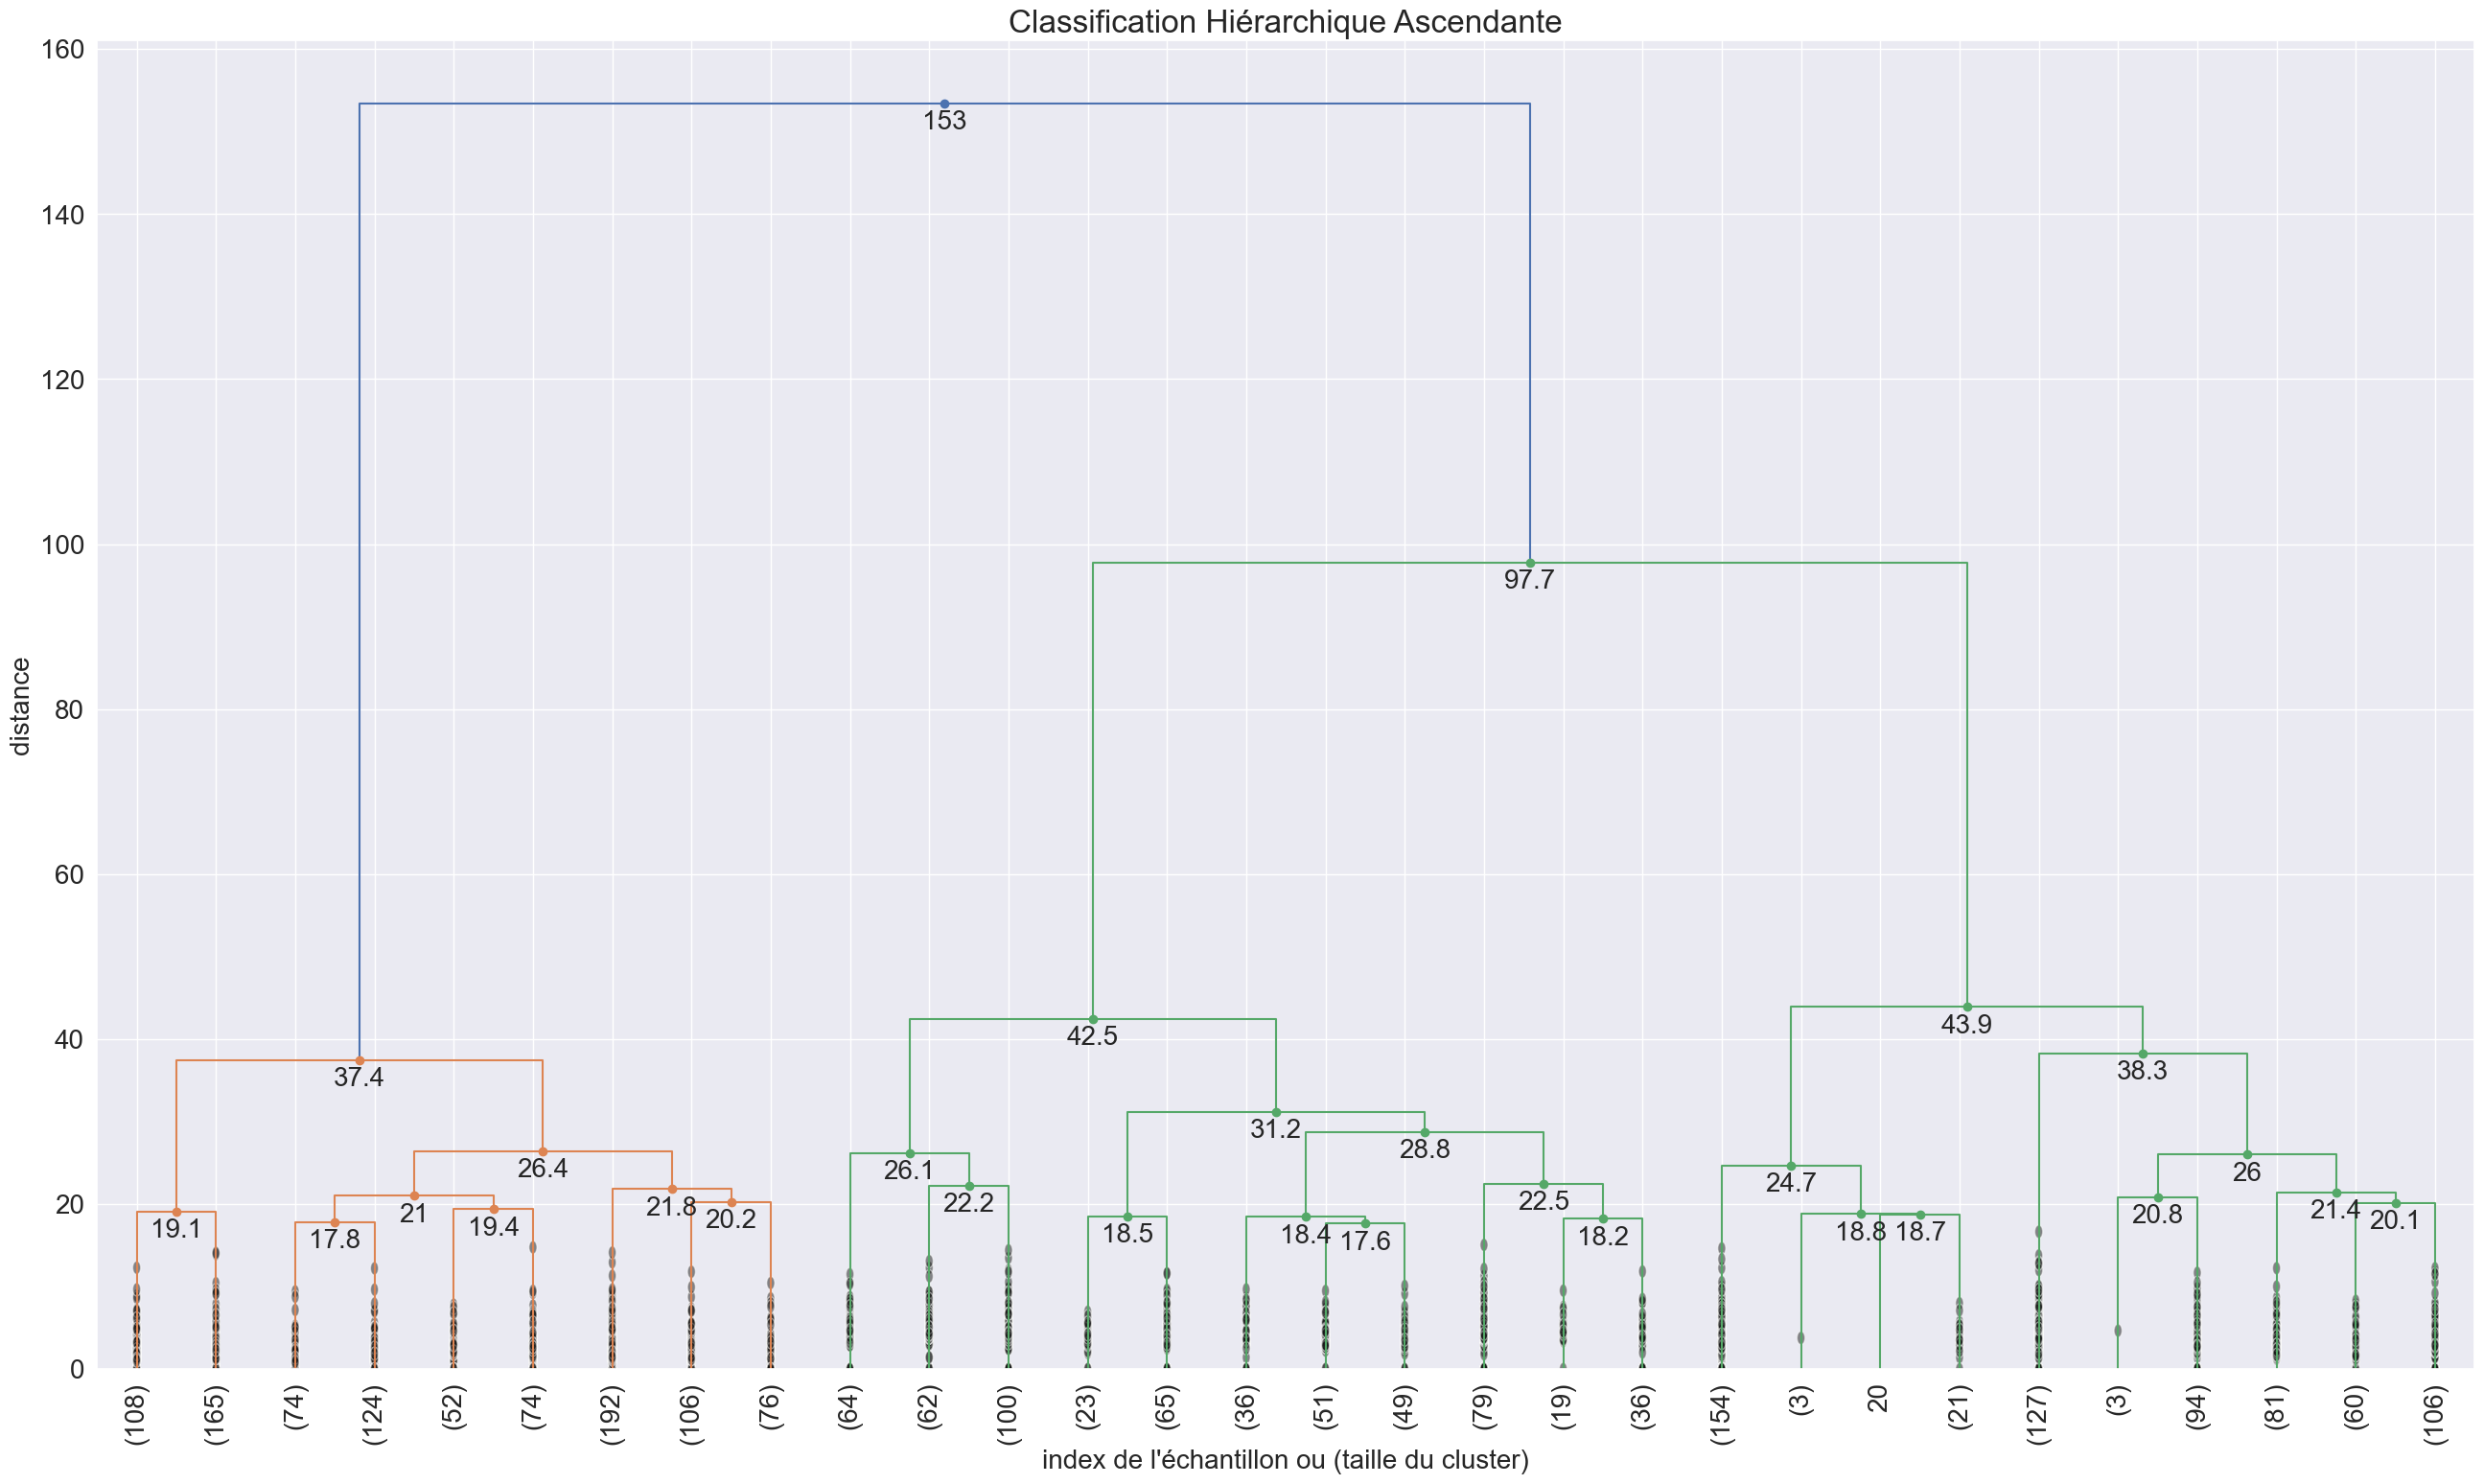

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(donneesT, method='ward')
plt.figure(figsize=(32, 18))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
#     p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,
#     max_d = 70,
)
plt.show()

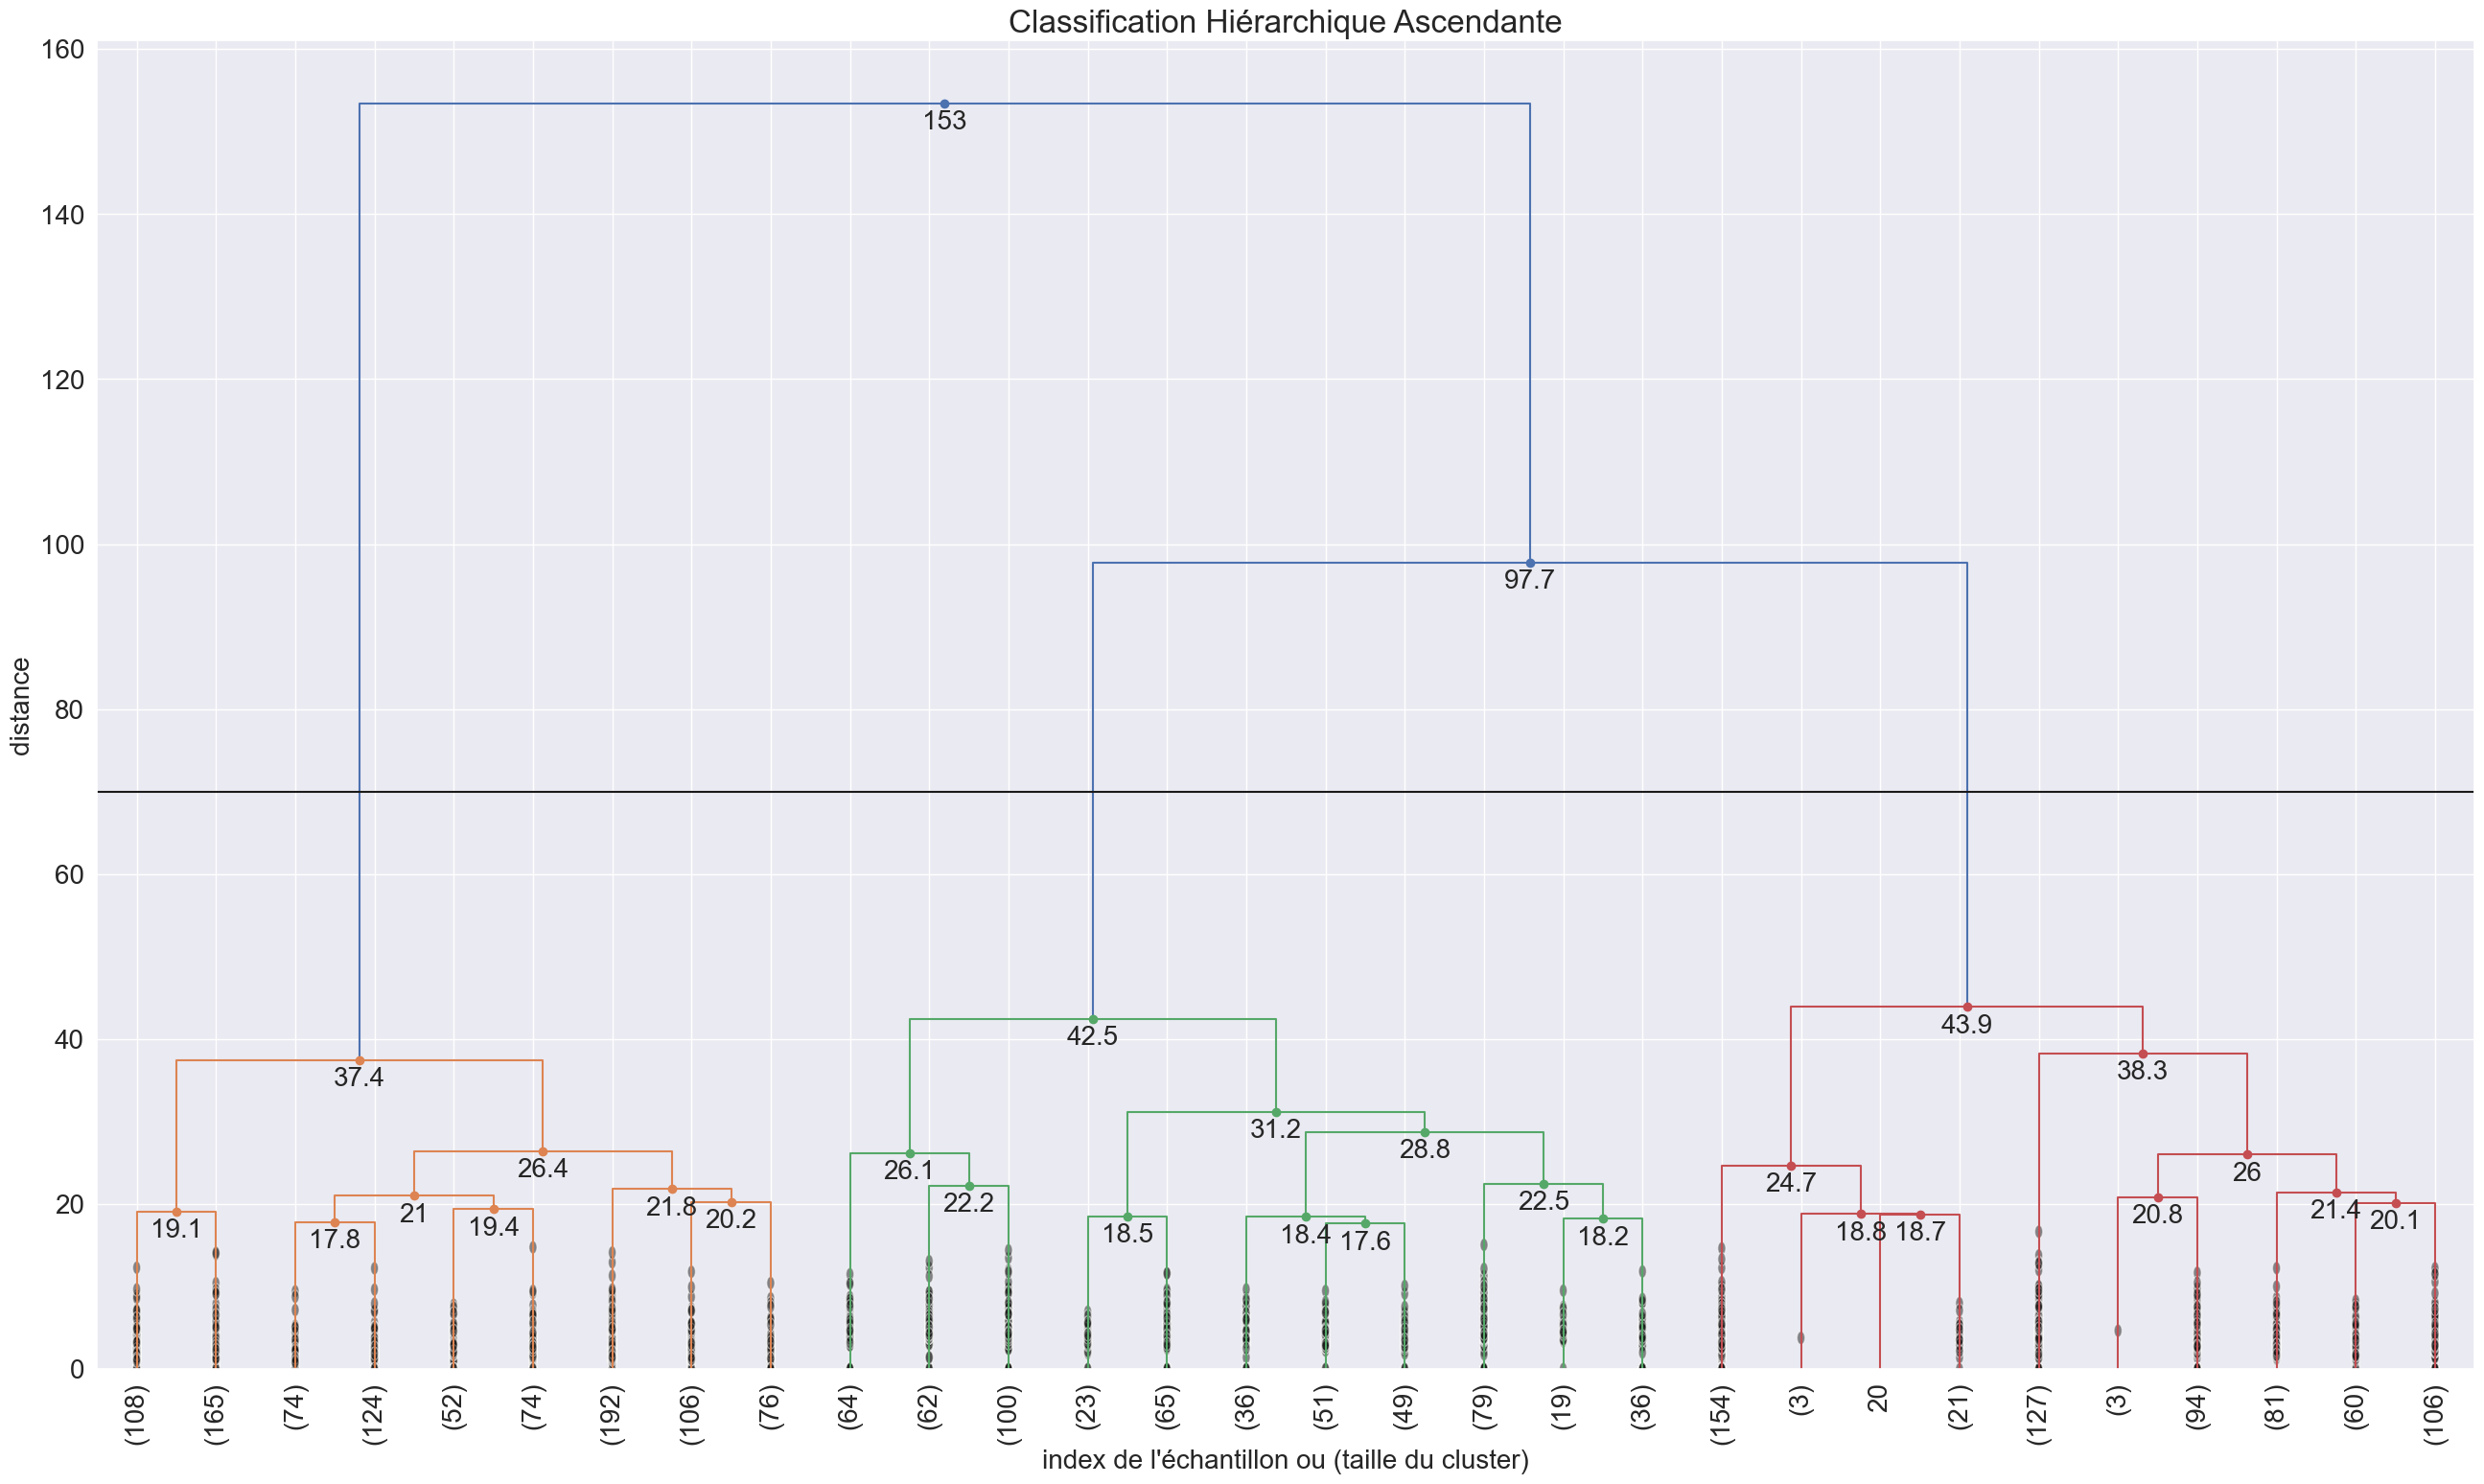

In [35]:
plt.figure(figsize=(32, 18))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
#     p=150,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,
    max_d = 70,
)
plt.show()

In [36]:
from scipy.cluster.hierarchy import fcluster
donneesT['Segments']=fcluster(Z, t=80, criterion='distance')

In [37]:
donneesT.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Customer_Days,MntTotal,MntRegularProds,Kidhome_0,Kidhome_1,Kidhome_2,Teenhome_0,Teenhome_1,Teenhome_2,AcceptedCmp3_0,AcceptedCmp3_1,AcceptedCmp4_0,AcceptedCmp4_1,AcceptedCmp5_0,AcceptedCmp5_1,AcceptedCmp1_0,AcceptedCmp1_1,AcceptedCmp2_0,AcceptedCmp2_1,Complain_0,Complain_1,Response_0,Response_1,marital_Divorced_0,marital_Divorced_1,marital_Married_0,marital_Married_1,marital_Single_0,marital_Single_1,marital_Together_0,marital_Together_1,marital_Widow_0,marital_Widow_1,education_2n Cycle_0,education_2n Cycle_1,education_Basic_0,education_Basic_1,education_Graduation_0,education_Graduation_1,education_Master_0,education_Master_1,education_PhD_0,education_PhD_1,AcceptedCmpOverall_0,AcceptedCmpOverall_1,AcceptedCmpOverall_2,AcceptedCmpOverall_3,AcceptedCmpOverall_4,Segments
0,0.314651,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,1.017189,1.527183,1.678056,1.665625,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,2
1,-0.254877,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,1.273530,-1.188629,-0.940880,-0.909676,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1
2,0.965354,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,0.333612,-0.205999,0.297384,0.312960,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,2
3,-1.206087,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-1.289883,-1.060245,-0.893989,-0.859109,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1
4,0.322136,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-1.033542,-0.951612,-0.270516,-0.228829,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1


# Analyse

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [27]:
X_train, X_test, y_train, y_test = train_test_split(donneesT.drop(columns='Segments'), 
                                                    donneesT.Segments, 
                                                    test_size=0.40, 
                                                    random_state = 5,
                                                    stratify= donneesT.Segments, )

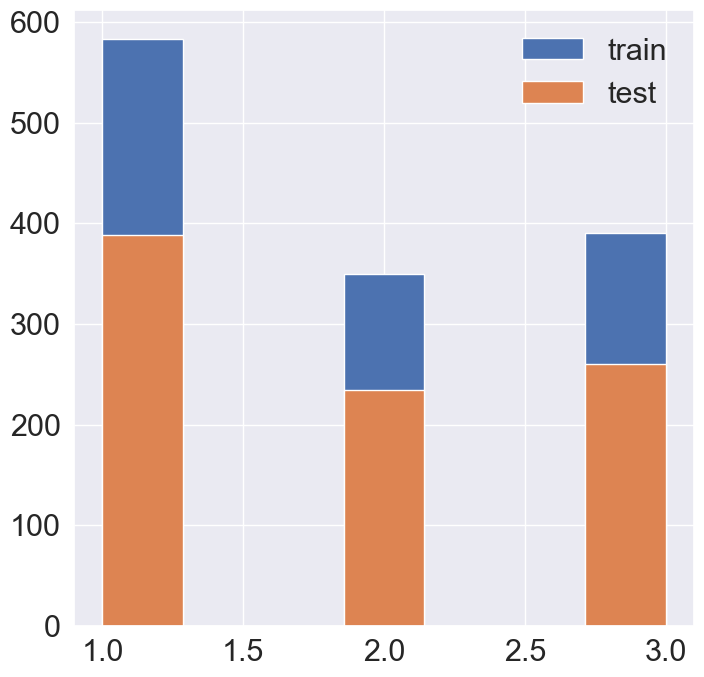

In [28]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();

In [29]:
# Using Grid Search to find the best parameters
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto'],
    'max_depth' : [None,3,5,8],
    'criterion' :['gini'],
    'min_samples_split':[2,3,4]
}

# Entraînement dy modèles RF Training RF Models with K-Fold of 5 
rf_models = GridSearchCV(RandomForestClassifier(random_state = 5), param_grid=param_grid, cv=5, verbose=1)
rf_models.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   31.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=5,
                                   

In [30]:
# Get the predictions
predictions = rf_models.predict(X_test)

# Print the Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(predictions, y_test))

Accuracy: 0.9172335600907029


In [31]:
# Print Feature Importance
feature_importance = pd.DataFrame(data={"Variables":X_test.columns, "importance %":rf_models.best_estimator_.feature_importances_*100})
feature_importance.sort_values("importance %", ascending=False).head(15).style.background_gradient(cmap='coolwarm', low=1, high=0)

,Variables,importance %
15,MntTotal,10.682338
4,MntMeatProducts,10.289432
16,MntRegularProds,9.728854
2,MntWines,8.310314
0,Income,8.037129
10,NumCatalogPurchases,7.274815
3,MntFruits,6.708856
6,MntSweetProducts,3.997422
8,NumDealsPurchases,3.685250
5,MntFishProducts,3.660804
